# **Anomaly Detection in Global Temperature Data Using PyOD's Isolation Forest**

In [2]:
from google.colab import files
da = files.upload()

Saving all countries global temperature.csv to all countries global temperature.csv


In [3]:
import pandas as pd

In [4]:
global_temperatures_data = pd.read_csv('all countries global temperature.csv')

# **Preliminary Data Exploration**

**View the First Few Rows:**

In [5]:
global_temperatures_data.head()


,ObjectId,Country Name,Unit,Change,1970,1971,1972,1973,1974,1975,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,"Afghanistan, Islamic Rep. of",Degree Celsius,Surface Temperature Change,0.898,0.652,-1.089,0.262,-0.470,-0.468,...,0.234,1.308,0.457,1.101,1.607,1.568,1.580,0.960,0.544,1.421
1,2,Albania,Degree Celsius,Surface Temperature Change,-0.119,-0.200,-0.077,-0.299,-0.134,-0.203,...,1.568,1.444,1.322,1.665,1.601,1.269,2.146,1.823,1.623,1.682
2,3,Algeria,Degree Celsius,Surface Temperature Change,0.114,-0.380,-0.342,-0.028,-0.502,-0.554,...,1.128,1.173,1.676,1.101,1.736,1.498,1.211,1.094,1.913,2.317
3,4,American Samoa,Degree Celsius,Surface Temperature Change,-0.036,-0.473,-0.070,0.322,-0.317,-0.128,...,0.646,0.883,0.554,0.394,0.924,0.820,0.574,0.924,0.815,0.653
4,5,"Andorra, Principality of",Degree Celsius,Surface Temperature Change,0.081,-0.355,-0.526,-0.010,-0.412,0.207,...,1.196,0.757,1.857,1.546,1.830,1.771,1.761,1.813,2.401,1.367


**Check for Missing Values:**

In [6]:
global_temperatures_data.isnull().sum()


ObjectId         0
Country Name     0
Unit             0
Change           0
1970            37
1971            34
1972            32
1973            32
1974            34
1975            37
1976            35
1977            36
1978            35
1979            36
1980            34
1981            35
1982            35
1983            38
1984            37
1985            37
1986            36
1987            36
1988            36
1989            35
1990            36
1991            37
1992            16
1993            18
1994            18
1995            16
1996            16
1997            19
1998            15
1999            17
2000            16
2001            18
2002            15
2003            12
2004            13
2005            14
2006            11
2007            10
2008            14
2009            13
2010            12
2011            10
2012            13
2013            11
2014            11
2015            11
2016            12
2017            13
2018        

**Statistical Summary:**

In [7]:
global_temperatures_data.describe()


,ObjectId,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,227.000000,190.000000,193.000000,195.000000,195.000000,193.000000,190.000000,192.000000,191.000000,192.000000,...,214.000000,216.000000,216.000000,216.000000,215.000000,214.000000,216.000000,215.000000,214.000000,214.000000
mean,114.013216,0.097689,-0.190124,-0.075354,0.230226,-0.168347,-0.024305,-0.243792,0.170592,0.079359,...,0.887421,0.917185,1.096120,1.252981,1.427991,1.269939,1.288102,1.427628,1.538565,1.317009
std,65.696573,0.354175,0.232647,0.385045,0.332191,0.291944,0.418103,0.321562,0.249489,0.291574,...,0.438641,0.329476,0.564232,0.461446,0.406105,0.393581,0.612291,0.475653,0.627076,0.518561
min,1.000000,-1.284000,-0.879000,-1.796000,-0.992000,-0.953000,-1.099000,-1.169000,-0.703000,-0.864000,...,0.007000,0.102000,-0.008000,0.170000,0.096000,0.116000,0.285000,0.062000,0.080000,-0.288000
25%,57.500000,-0.038750,-0.307000,-0.194500,0.047000,-0.335000,-0.271250,-0.430250,0.004000,-0.012750,...,0.574500,0.686750,0.722250,0.975250,1.141000,0.981250,0.815000,1.106000,1.140250,0.993250
50%,114.000000,0.133000,-0.206000,-0.026000,0.245000,-0.213000,-0.128000,-0.258000,0.183000,0.116000,...,0.788500,0.906000,0.943000,1.230500,1.434000,1.261000,1.130000,1.396000,1.468000,1.287500
75%,170.500000,0.293750,-0.069000,0.113500,0.452500,-0.060000,0.094000,-0.072500,0.325500,0.227250,...,1.144500,1.174750,1.354750,1.501750,1.725000,1.541250,1.762000,1.696500,1.891500,1.695500
max,230.000000,0.978000,0.683000,0.942000,1.147000,1.125000,1.898000,0.727000,1.084000,0.916000,...,2.165000,1.684000,2.711000,2.605000,2.454000,2.486000,2.781000,2.713000,3.693000,2.543000


## **Data Cleaning and Transformation**

In [8]:
import numpy as np

In [10]:


# Handling missing values by imputing with the mean for each year
# Identify numeric columns (years in this case)
numeric_cols = global_temperatures_data.columns[global_temperatures_data.columns.str.isnumeric()]
# Impute missing values in these columns with their respective means
global_temperatures_data[numeric_cols] = global_temperatures_data[numeric_cols].apply(lambda x: x.fillna(x.mean()))

# Focusing on the global average temperature per year
# Assuming the years are columns from '1970' to '2021'
years = numeric_cols.tolist()  # or [str(year) for year in range(1970, 2022)] if years are exactly from 1970 to 2021
global_avg_temp = global_temperatures_data[years].mean()

# Creating a DataFrame for the average temperatures
final_data = pd.DataFrame({'Year': years, 'AvgTemp': global_avg_temp})


## **Choosing and Training the Anomaly Detection Model**

In [12]:
!pip install pyod


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190289 sha256=6d43bced8f55f2ff57384d68f80b3ae86585352b2acde502efeda11d5bd017bf
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


In [22]:
from pyod.models.iforest import IForest

# Initialize the Isolation Forest model
iforest = IForest()

# Training the model with our data
# We only use the 'AvgTemp' column for training as it's the feature of interest
iforest.fit(final_data[['AvgTemp']].values)  # Convert to NumPy array



IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

## **Identifying Anomalies**

In [23]:
outliers = iforest.predict(final_data[['AvgTemp']].values)

# Adding the prediction results to the DataFrame
final_data['Outlier'] = outliers


## **Analyzing the Results**

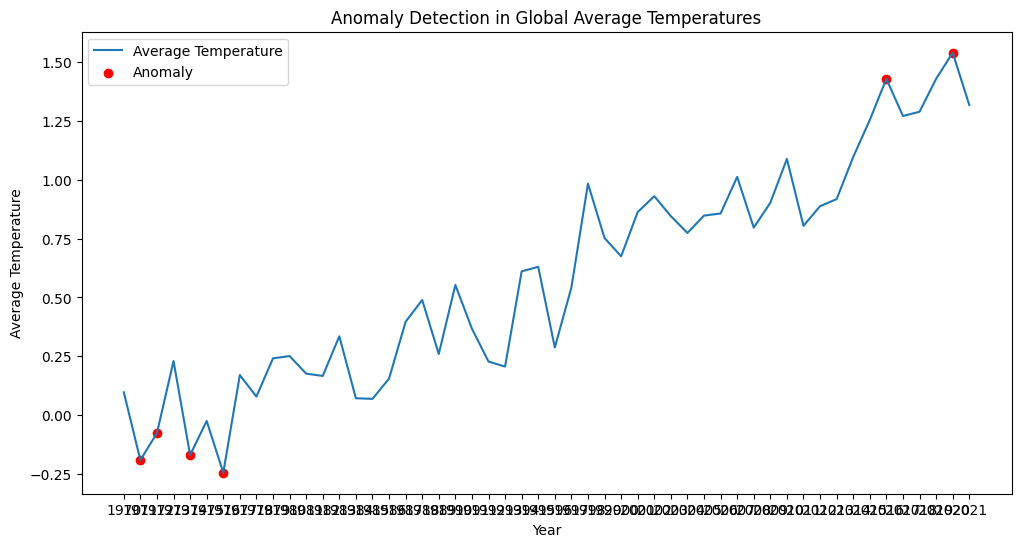

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(final_data['Year'], final_data['AvgTemp'], label='Average Temperature')
plt.scatter(final_data[final_data['Outlier'] == 1]['Year'],
            final_data[final_data['Outlier'] == 1]['AvgTemp'],
            color='r', label='Anomaly')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Anomaly Detection in Global Average Temperatures')
plt.legend()
plt.show()
